In [1]:
from PIL import Image
import numpy as np

Если библиотека PIL не импортируется, установите её с помощью команды ниже и перезапустите блокнот.

In [14]:
!pip install Pillow
# либо для одного текущего пользователя:
!pip install --user Pillow

Загрузите картинку с помощью команды open. Если необходимо, можете изменить размер картинки с помощью метода resize.

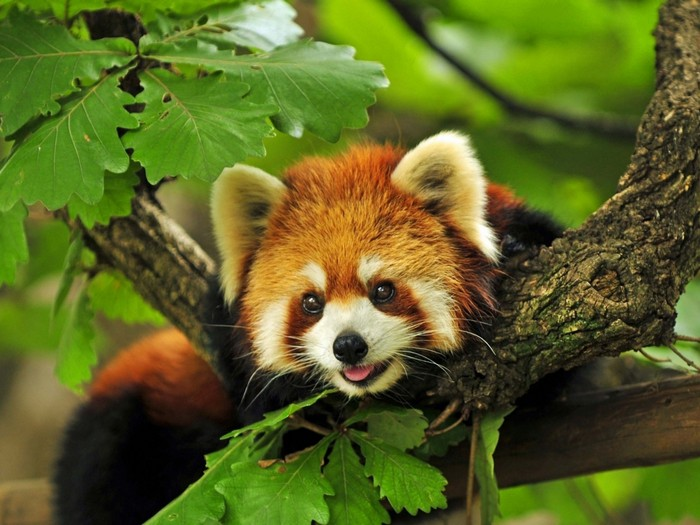

In [7]:
img = Image.open('panda.jpg')#.resize(())
img

Преобразуйте картинку из объекта класса PIL в Numpy массив.

In [8]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [9]:
x.shape

(525, 700, 3)

Видно, что исходная цветная картинка содержит три канала - RGB. Преобразуем её в одноканальную либо с помощью специальной функции rgb2gray либо обычным усреднением по трём каналам.

In [18]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

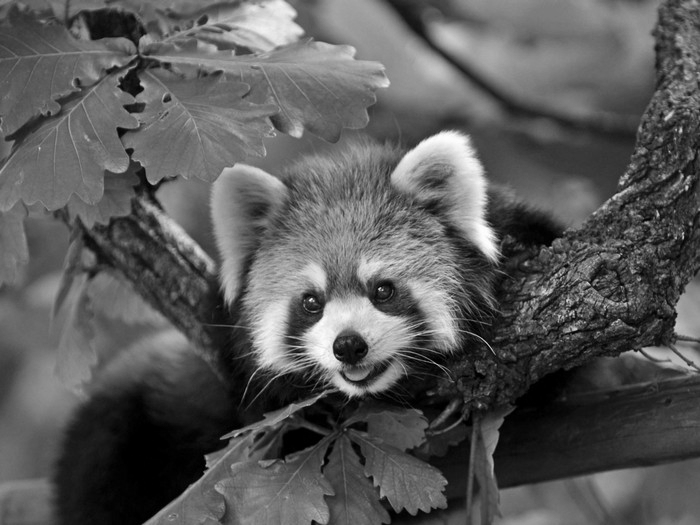

In [19]:
Image.fromarray(np.asarray(rgb2gray(x), dtype=np.uint8))

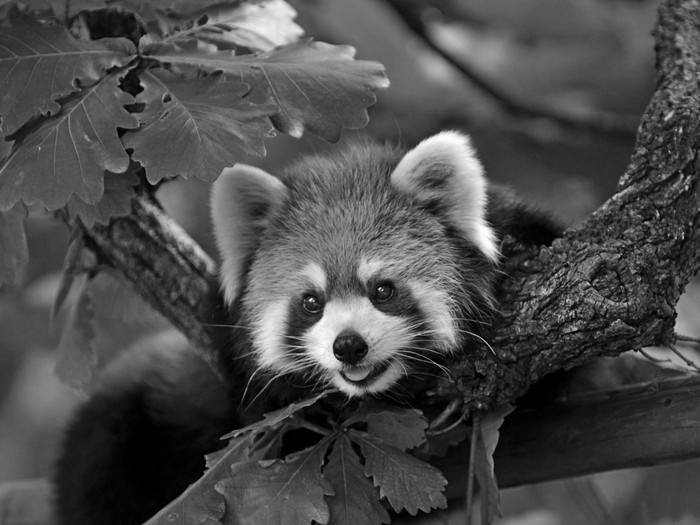

In [15]:
Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))

Дальше будем работать с одноканальной картинкой, т.е. двумерной матрицей.

In [12]:
#y = rgb2gray(x)
y = x.mean(axis=2)
y

array([[ 81.      ,  86.666664,  91.666664, ...,  78.666664,  70.666664,
         69.      ],
       [ 87.      ,  88.333336,  88.666664, ...,  96.666664,  78.333336,
         72.      ],
       [ 94.666664,  94.333336,  90.666664, ..., 111.333336,  88.      ,
         76.666664],
       ...,
       [ 84.666664,  80.666664,  75.666664, ...,  90.333336,  89.333336,
         88.333336],
       [ 84.666664,  80.333336,  76.      , ...,  93.333336,  92.      ,
         91.      ],
       [ 85.      ,  81.      ,  75.      , ...,  95.666664,  94.      ,
         93.      ]], dtype=float32)

In [11]:
y.shape

(525, 700)

Сделаем SVD разложение

In [20]:
U, S, V = np.linalg.svd(y, full_matrices=False)

In [21]:
U.shape

(525, 525)

In [22]:
V.shape

(525, 700)

Проверим что разложение корректное, соберём его обратно, перемножив матрицы

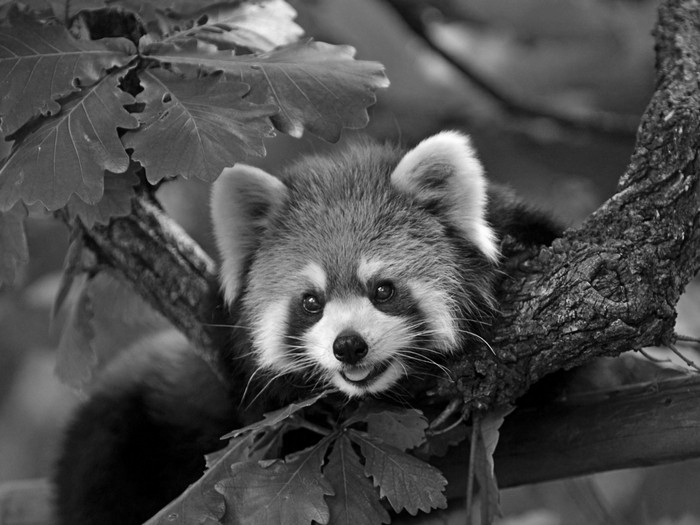

In [23]:
Y_full = U.dot(np.diag(S)).dot(V)
Image.fromarray(np.asarray(Y_full, dtype=np.uint8))

PIL объект можно при необходимости сохранить в файл на диск

In [24]:
Image.fromarray(np.asarray(Y_full, dtype=np.uint8)).save(f'full_rank.png')

**Задание для самостоятельной работы:**  
1. Рассмотреть малоранговые разложения
2. Получить картинки для разного значения ранга
3. Сохранить несколько картинок на диск
4. Сделать выводы

**Подсказки:**  
Не забудьте при преобразовании Numpy массива в объект PIL преобразовывать тип элементов в np.uint8.  
Если число находится вне диапазона [0, 255], сделайте клиппирование - все числа больше 255 приравняйте числу 255, все отрицательные числа сделайте равными нулю.